# COURSE: A deep understanding of deep learning
## SECTION: Math prerequisites
### LECTURE: Softmax
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202207

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[-1 11 13  9  6  6  8 13  6 13  7 -3  0 -1  0  9  6  2  8 12 12 -2 11  1
  4]


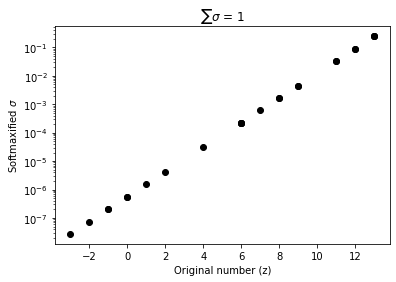

In [3]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

# Using pytorch

In [4]:
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

tensor([2.0467e-07, 3.3311e-02, 2.4613e-01, 4.5081e-03, 2.2445e-04, 2.2445e-04,
        1.6584e-03, 2.4613e-01, 2.2445e-04, 2.4613e-01, 6.1011e-04, 2.7699e-08,
        5.5635e-07, 2.0467e-07, 5.5635e-07, 4.5081e-03, 2.2445e-04, 4.1109e-06,
        1.6584e-03, 9.0548e-02, 9.0548e-02, 7.5293e-08, 3.3311e-02, 1.5123e-06,
        3.0375e-05])


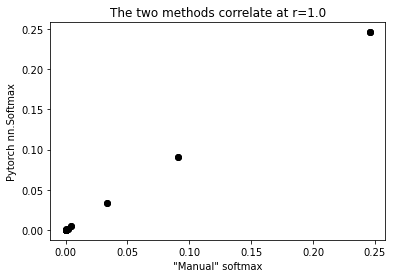

In [5]:
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()